In [1]:
import qiskit_metal as qm

In [2]:
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6
from qiskit_metal.qlibrary.qubits.star_qubit import StarQubit

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
import numpy as np
from collections import OrderedDict

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [4]:
design.chips.main.size.size_x='5 mm'
design.chips.main.size.size_y='5 mm'
design.chips.default_settings['cheese'] = False
design.chips.default_settings['layer_start'] = 0

In [5]:
def StarOptions():
    dic = StarQubit.get_template_options(design)
    for i in dic:
        print(f'{i} - {dic[i]}')

In [6]:
StarOptions()

pos_x - 0.0um
pos_y - 0.0um
orientation - 0.0
chip - main
layer - 1
radius - 300um
center_radius - 100um
gap_couplers - 25um
gap_readout - 10um
connector_length - 75um
trap_offset - 20um
junc_h - 100um
cpw_width - 0.01
rotation_cpl1 - 0.0
rotation_cpl2 - 72.0
rotation_rdout - 144.0
rotation_cpl3 - 216.0
rotation_cpl4 - 288.0
number_of_connectors - 4
resolution - 16
cap_style - round
subtract - False
helper - False
hfss_inductance - 10nH
hfss_capacitance - 0
hfss_resistance - 0
hfss_mesh_kw_jj - 7e-06
q3d_inductance - 10nH
q3d_capacitance - 0
q3d_resistance - 0
q3d_mesh_kw_jj - 7e-06
gds_cell_name - my_other_junction


In [7]:
def guidraw(n=1, dlt=False, hlt=False):
    if dlt:
        gui.rebuild()
        gui.screenshot()
    else:
        gui.rebuild()
        gui.autoscale()
        all_component_names = design.components.keys()
        if n==1:
            gui.edit_component(['Q1'])
        gui.zoom_on_components(all_component_names)
        if hlt:
            all_component_names = design.components.keys()
            gui.highlight_components(all_component_names)
        gui.screenshot()

In [8]:
def clean():
    design.delete_all_components()

In [9]:
def threeStar(a=3):
    options = Dict(
        layer = '0',
        radius = '300um',
        center_radius = '100um',
        gap_couplers = '25um',
        gap_readout = '10um',
        connector_length = '75um',
        trap_offset = '20um',
        junc_h = '100um',
        cpw_width = '0.01',
        rotation_cpl1 = '0.0',
        rotation_cpl2 = '60.0',
        rotation_rdout = '270.0',
        rotation_cpl3 = '120.0',
        rotation_cpl4 = '180.0',
        number_of_connectors = 4,
        resolution = 16,
        cap_style = 'round'
    )

    q1 = StarQubit(design, 'Q1', options=Dict(pos_x='+0.00mm', pos_y=str(a*np.sqrt(3)/2) + 'mm', orientation = -30, **options))
    q2 = StarQubit(design, 'Q2', options=Dict(pos_x=str(a/2) + 'mm', pos_y='+0.00mm', orientation = 90, **options))
    q3 = StarQubit(design, 'Q3', options=Dict(pos_x=str(-a/2) + 'mm', pos_y='+0.00mm', orientation = 90,  **options))
    
    guidraw(n=3, hlt=True)

In [10]:
clean()

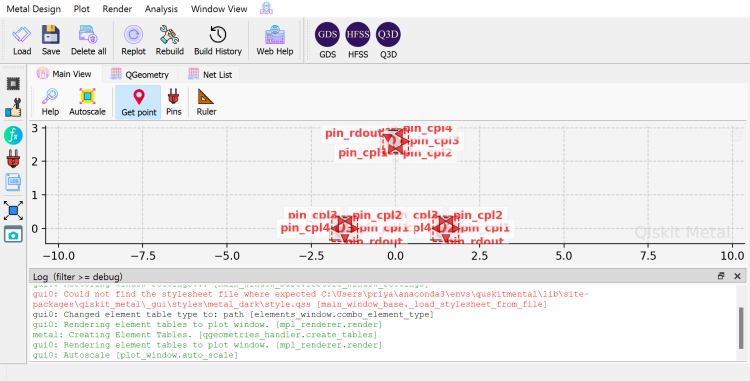

In [11]:
threeStar()

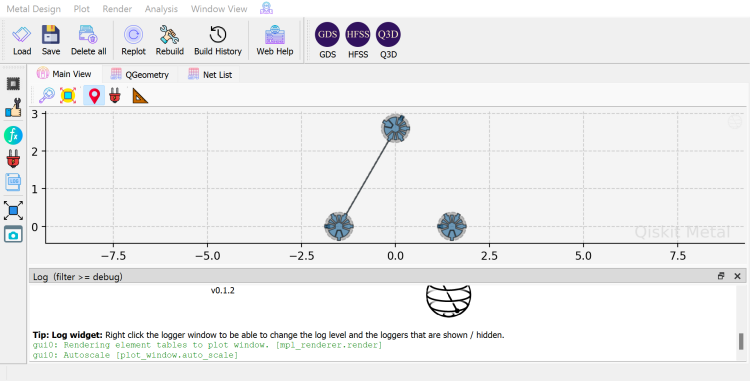

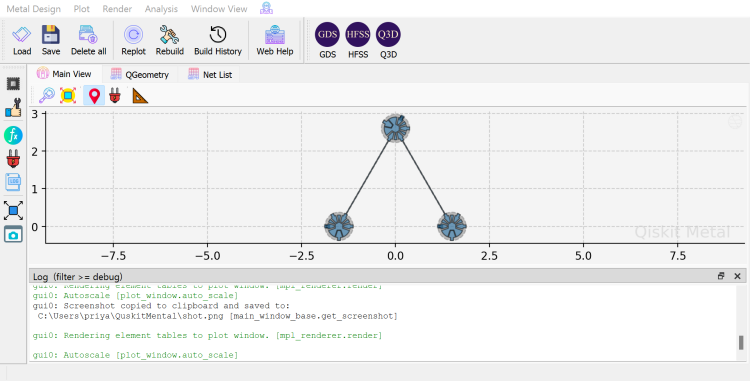

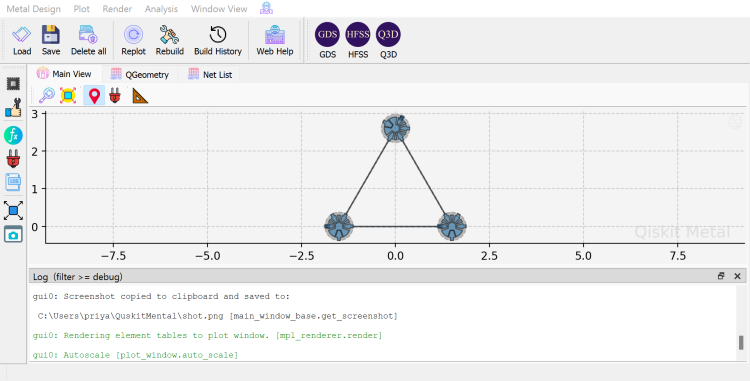

In [14]:
def connectingStar(design, start_component, start_pin, end_component, end_pin):
    ops= Dict(fillet = '90um')
    route_options = Dict(
        total_length='9mm',
        hfss_wire_bonds=True,
        pin_inputs=Dict(
            start_pin=Dict(
                component=start_component,
                pin=start_pin
            ),
            end_pin=Dict(
                component=end_component,
                pin=end_pin
            )
        ),
        lead=Dict(
            start_straight='0.1mm',
            end_straight='0.1mm'
        ),
        meander=Dict(asymmetry='-0.5mm'),
        layer=0,
        **ops
    )
    
    route_name = f'cpw_{start_component}_{end_component}'
    
    existing_route = globals().get(route_name)
    if existing_route:
        existing_route.delete()
    
    globals()[route_name] = RouteStraight(design, options=route_options)

    guidraw(n=3)

# Define common options


# Create routes
connectingStar(design, 'Q1', 'pin_cpl1', 'Q3', 'pin_cpl2')
connectingStar(design, 'Q1', 'pin_cpl2', 'Q2', 'pin_cpl3')
connectingStar(design, 'Q2', 'pin_cpl4', 'Q3', 'pin_cpl1')
